In [1]:
!pip install nltk

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
import re
import emoji

def remove_urls(text):
    # Regular expression to find URLs
    url_pattern = re.compile(r'http\S+|www\S+|https\S+')
    return url_pattern.sub(r'', text)

def remove_emojis(text):
    # Function to remove emojis
    return emoji.replace_emoji(text, replace='')

def text_cleaning(text):
    # Process each row in the list
    cleaned_topics = []
    for row in text:
        no_urls = remove_urls(row)
        no_emojis = remove_emojis(no_urls)
        cleaned_topics.append(no_emojis)
    return cleaned_topics

In [15]:

str(real_data)

'["\'\'Everything I have I owe to bodybuilding. It taught me hard work pays off and that it doesn\'t happen overnight. The biggest problem of my generation and the younger generation is people don\'t wanna work for it, they want it right now.\'\'\\n@thebranchwarren\\n#HardWorkPaysOff #bodybuilding #motivation #BranchWarren #NickVisionMotivation #WorkHard #metroflex #training #AllOrNothing #SetYourGoals #posing #gym #MakeItHappen #dream #gains #goals #fitness #aesthetics #MrOlympia #physique #gymlife #gymrat #workout #passion #Beastmode #HardWork #push #BelieveToAchieve #motivated", \'#ThrowbackThursday ⠀\\nIf physios are scared of pain, how can they expect their patients not to be!" - Peter O\\\'Sullivan⠀⠀\\n⠀⠀\\nSmith et al. (2017) compared the effect of exercises where pain is allowed/encouraged compared with non-painful exercises on pain, function or disability in patients with chronic musculoskeletal pain within randomised controlled trials.⠀⠀\\n⠀⠀\\nThey found that protocols using

In [33]:
data=pd.read_csv(r"C:/Users/I6240624/Documents/BISS/Master Thesis/Code/DarianOthmanMasterThesis/Generation_English/Generic_t=1_P=1_YouTube_English.csv", sep=";", header=None)

real_data = data[1]
synthetic_data = data[0]
shared_data = data[0]+data[1]

def preprocess_and_create_word_cloud(data, title):
    text = ' '.join(data.iloc[:])

    vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]+\b', lowercase=True)
    counts = vectorizer.fit_transform([text])

    words = vectorizer.get_feature_names_out()

    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(lemmatized_words))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


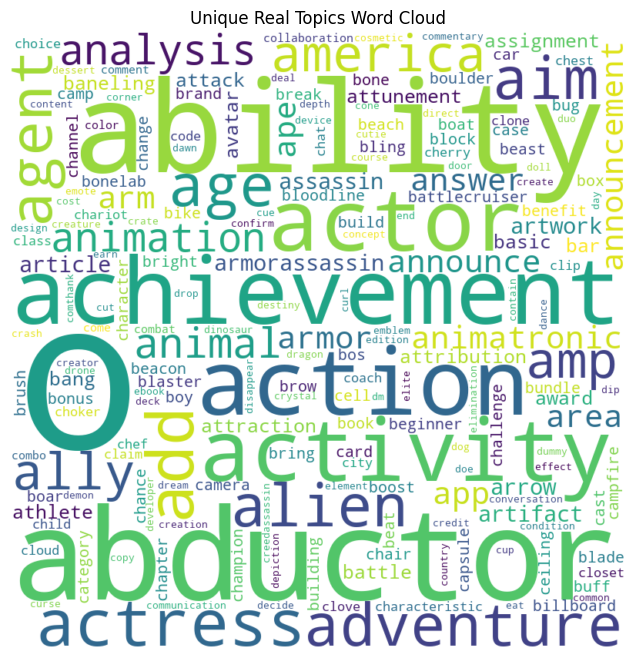

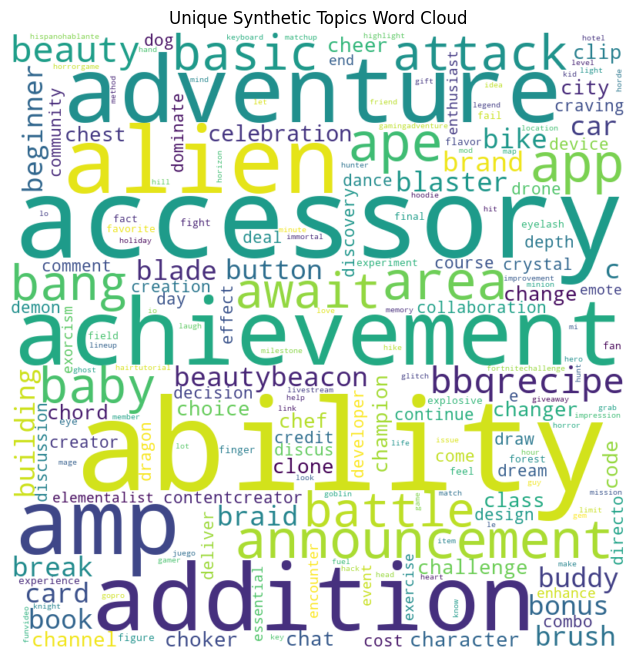

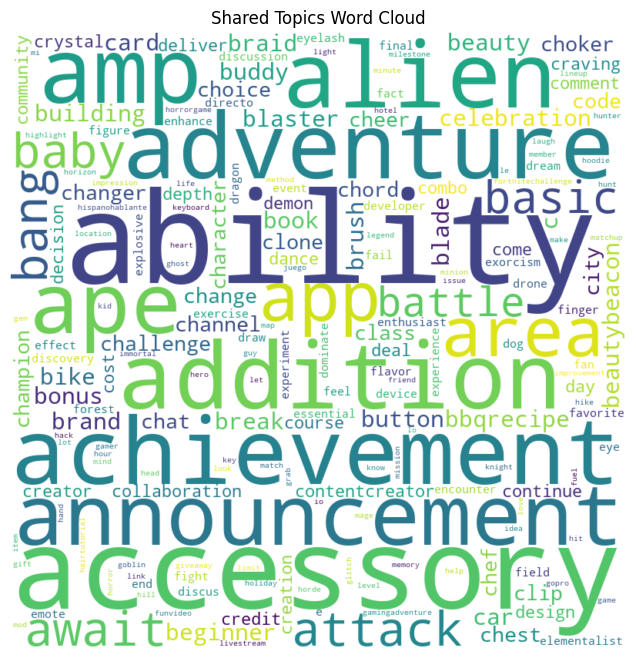

In [34]:
preprocess_and_create_word_cloud(real_data, "Unique Real Topics Word Cloud")
preprocess_and_create_word_cloud(synthetic_data, "Unique Synthetic Topics Word Cloud")
preprocess_and_create_word_cloud(synthetic_data, "Shared Topics Word Cloud")